In [41]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("weather_data.csv")

# Handle missing values
# Fill missing numeric values with the mean
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Fill missing non-numeric values with the mode
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
for col in non_numeric_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Handle incorrect entries (e.g., unrealistic temperatures)
data = data[(data['avg_temperature'] >= -20) & (data['avg_temperature'] <= 50)]

# Convert 'rain_or_not' to binary (1 for Rain, 0 for No Rain)
data['rain_or_not'] = data['rain_or_not'].apply(lambda x: 1 if x == 'Rain' else 0)

# Extract useful features from the date column
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Drop the original date column
data.drop('date', axis=1, inplace=True)

# Verify no missing values remain
print(data.isnull().sum())

avg_temperature    0
humidity           0
avg_wind_speed     0
rain_or_not        0
cloud_cover        0
pressure           0
month              0
day                0
dtype: int64


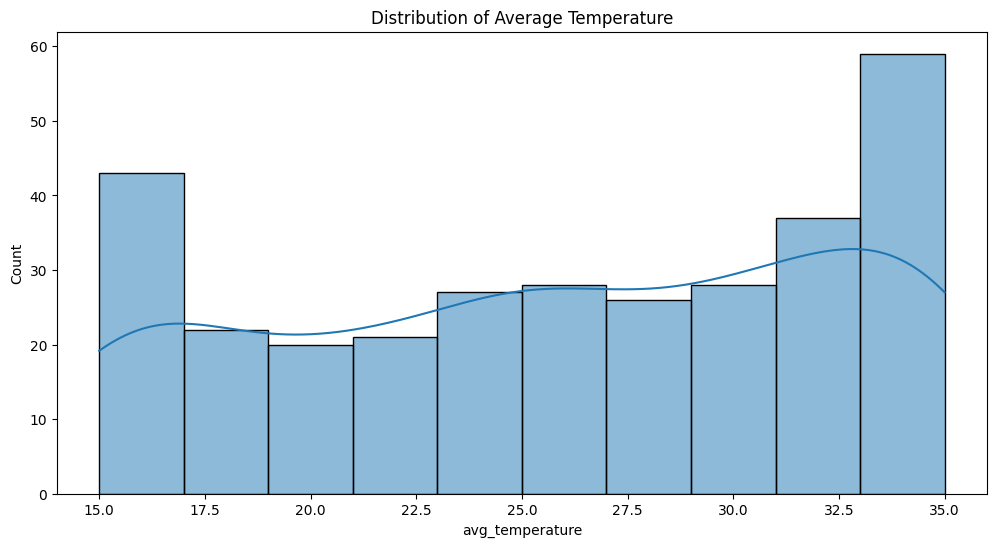

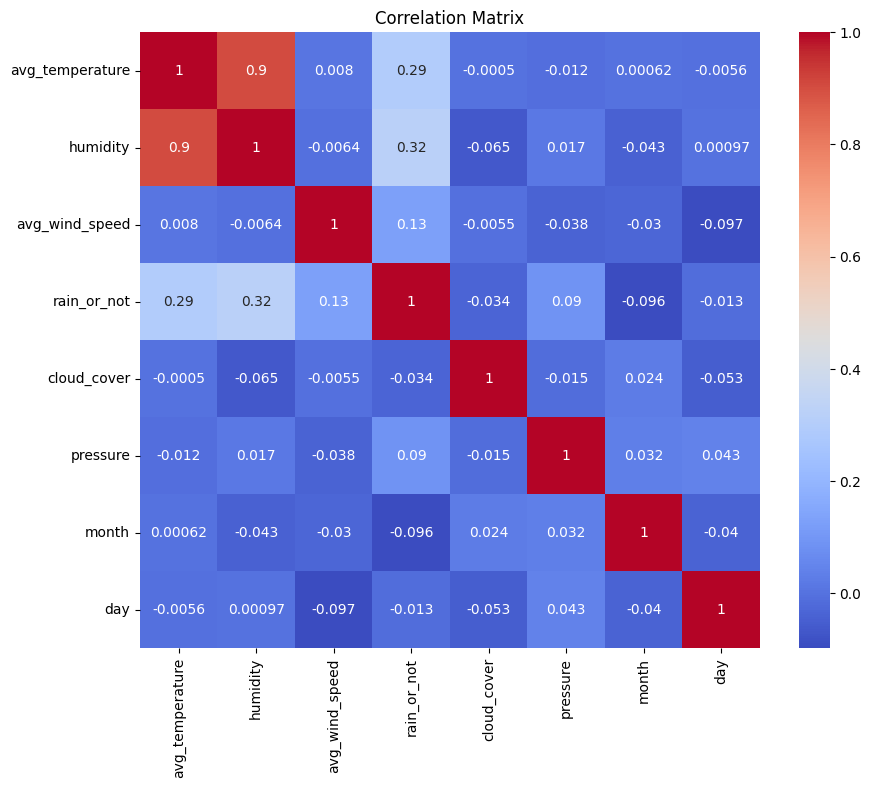

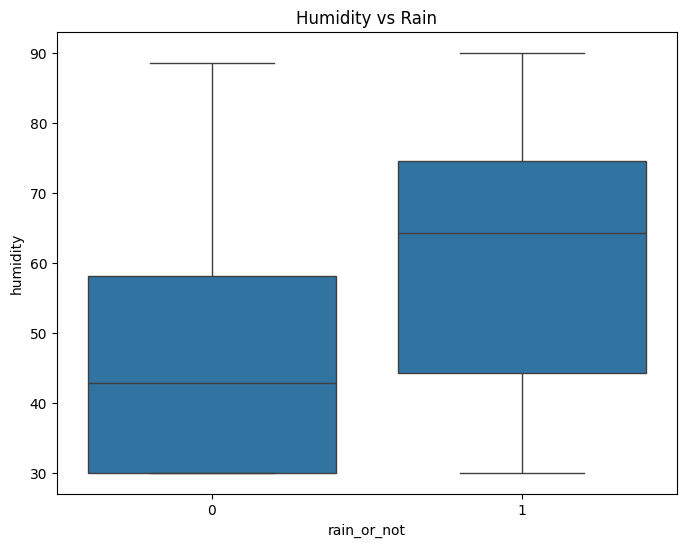

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of features
plt.figure(figsize=(12, 6))
sns.histplot(data['avg_temperature'], kde=True)
plt.title("Distribution of Average Temperature")
plt.show()

# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Relationship between humidity and rain
plt.figure(figsize=(8, 6))
sns.boxplot(x='rain_or_not', y='humidity', data=data)
plt.title("Humidity vs Rain")
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the data into features and target
X = data.drop('rain_or_not', axis=1)
y = data['rain_or_not']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.6276595744680851
Precision: 0.6507936507936508
Recall: 0.7592592592592593
F1-Score: 0.7008547008547008
ROC-AUC Score: 0.6046296296296296


In [45]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best Model F1-Score:", f1_score(y_test, y_pred_best))

Best Model F1-Score: 0.7107438016528925


In [47]:
# Predict probabilities
y_prob = best_model.predict_proba(X_test)[:, 1]

# Save predictions for the next 21 days
future_predictions = pd.DataFrame({
    'Day': range(1, 22),
    'Probability_of_Rain': y_prob[:21]
})
future_predictions.to_csv("rain_predictions.csv", index=False)
print (future_predictions )

    Day  Probability_of_Rain
0     1             0.676845
1     2             0.938333
2     3             0.610687
3     4             0.656913
4     5             0.903726
5     6             0.474754
6     7             0.587190
7     8             0.343512
8     9             0.552429
9    10             0.646607
10   11             0.410036
11   12             0.982333
12   13             0.567413
13   14             0.399321
14   15             0.519917
15   16             0.596690
16   17             0.456833
17   18             0.797167
18   19             0.679948
19   20             0.527492
20   21             0.330083
